<a href="https://colab.research.google.com/github/dinithprimal/TensorFlow_HandsOn/blob/main/Ex05_Tensorflow_2x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Sequential Neural Network

### Imports

In [2]:
%tensorflow_version 2.x

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper liberaries
import numpy as np
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # Load dataset

# Split into testing and training
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [7]:
train_images[0, 23, 23] # Value of a one pixel (one pixel value between 0 and 255)

194

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

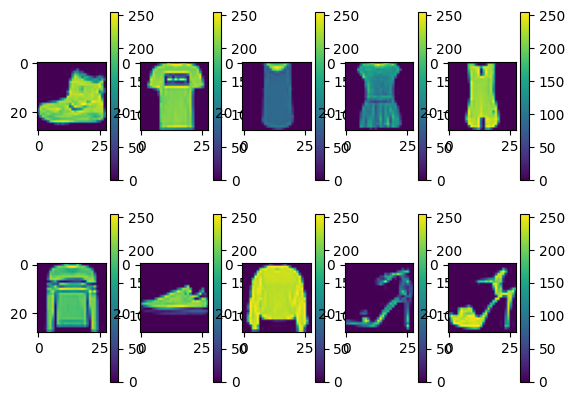

In [16]:
plt.figure()
plt.subplot(2, 5, 1)
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 2)
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 3)
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 4)
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 5)
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 6)
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 7)
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 8)
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 9)
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)

plt.subplot(2, 5, 10)
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)

plt.show()


### Data Preprocessing

In [17]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

### Building the Model

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),   # Input layer (1)
    keras.layers.Dense(128, activation = 'relu'),   # Hidden layer (2)
    keras.layers.Dense(10, activation = 'softmax')  # Output layer (3)
])

### Compile the Model

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Training the Model

In [22]:
model.fit(train_images, train_labels, epochs = 10) # Pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5036 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3760 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3383 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3144 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2833 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2482 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

### Evaluating the Model

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=1)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8828
Test accuracy:  0.8827999830245972


### Making Predictions

In [24]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [25]:
predictions[0]

array([4.8228083e-07, 7.9846059e-09, 6.7302331e-08, 7.1180518e-12,
       5.8564660e-09, 4.2809814e-02, 1.7617081e-07, 2.9266292e-02,
       2.2136594e-07, 9.2792284e-01], dtype=float32)

In [28]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


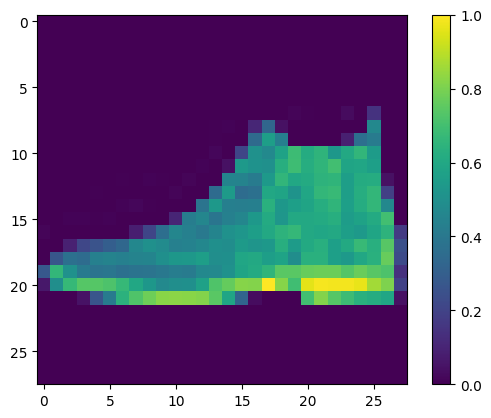

In [27]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Verifying Predictions

In [46]:
COLOR = 'red'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure(figsize=[3,3])
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: "+ label)
  plt.xlabel("Guess: "+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    try:
      num = int(input("Pick a numbe: "))
      if 0 <= num <= 1000:
        return num
    except TypeError:
      print("Enter a valid integer number")


Pick a numbe: 55
1/1 [==============================] - 0s 22ms/step


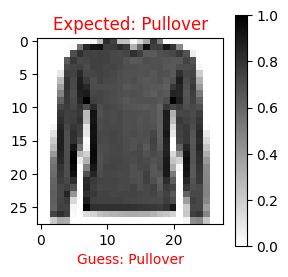

In [48]:
num = get_number()
image = test_images[num]
label = test_lables[num]
predict(model, image, label)
